<a href="https://colab.research.google.com/github/yoursenpai69/dl-exp3/blob/main/Copy_of_Ex03_minist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

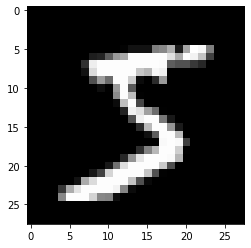

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

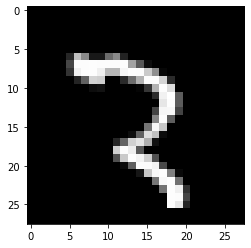

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [64]:
model = keras.Sequential()
# Write your code here
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation="softmax"))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [66]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 29s 31ms/step - loss: 0.1922 - accuracy: 0.9441 - val_loss: 0.0622 - val_accuracy: 0.9798
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0645 - accuracy: 0.9802 - val_loss: 0.0458 - val_accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0403 - val_accuracy: 0.9863
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0396 - val_accuracy: 0.9868
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0341 - val_accuracy: 0.9888


In [68]:
metrics = pd.DataFrame(model.history.history)

In [69]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.192248,0.944050,0.062204,0.9798
1,0.064505,0.980183,0.045818,0.9848
2,0.045040,0.986467,0.040328,0.9863
3,0.034042,0.989367,0.039629,0.9868
4,0.024881,0.991850,0.034059,0.9888


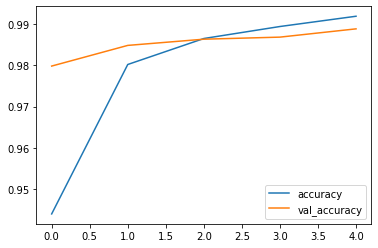

In [70]:
metrics[['accuracy','val_accuracy']].plot()

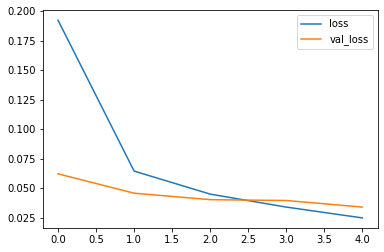

In [71]:
metrics[['loss','val_loss']].plot()

In [72]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [73]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 973    1    1    1    0    1    3    0    0    0]
 [   0 1129    2    1    0    1    1    0    1    0]
 [   1    2 1023    0    0    0    0    5    1    0]
 [   0    0    1 1000    0    7    0    0    2    0]
 [   1    0    0    0  974    0    0    0    0    7]
 [   0    0    0    4    0  886    2    0    0    0]
 [   5    2    0    0    2    2  947    0    0    0]
 [   1    1    6    1    0    0    0 1014    1    4]
 [   3    0    3    3    2    3    1    3  946   10]
 [   0    1    0    3    5    3    0    1    0  996]]


In [74]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [90]:
img = image.load_img('test.JPG')

In [76]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [91]:
img = image.load_img('test.JPG')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [92]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [93]:
print(x_single_prediction)

[1]


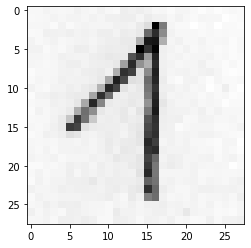

In [94]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [95]:

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [96]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [97]:
print(x_single_prediction)

[1]
